In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from classifier import rf, plot_confusion_matrix, lda, qda, qda_lol, lda_lol

#### Class labels
GABA
* 0 = Non-GABA
* 1 = GABA

Shaft 
* 0 = Non-shaft
* 1 = Shaft

GABA + Shaft
* 0 = Non-GABA, Non-Shaft
* 1 = Non-GABA, Shaft
* 2 = GABA, Non-Shaft
* 3 = GABA, Shaft

In [2]:
X = np.load('./data/data_isotropic.npy')
gaba = np.load('./data/gaba_label.npy')
shaft = np.load('./data/shaft_label.npy')
gaba_shaft = np.load('./data/gaba_shaft_label.npy')
mask = np.load('./data/15_9_9_edge_mask.npy')

In [3]:
X = X[mask]
gaba = gaba[mask]
shaft = shaft[mask]
gaba_shaft = gaba_shaft[mask]

#### Compute mean intensity in each cube for each channel
The output should be of shape (n_samples, n_channels)

In [4]:
X_mean = X.mean(axis=(2, 3, 4))

X_mean.shape

(927, 8)

#### Look at the distribution of the data for Non-GABA vs GABA

In [5]:
channels = ['GABA', 'GAD2', 'Gephyrin', 'GluN1', 'PSD95', 'synapsin', 'TdTomato', 'VGlut1']

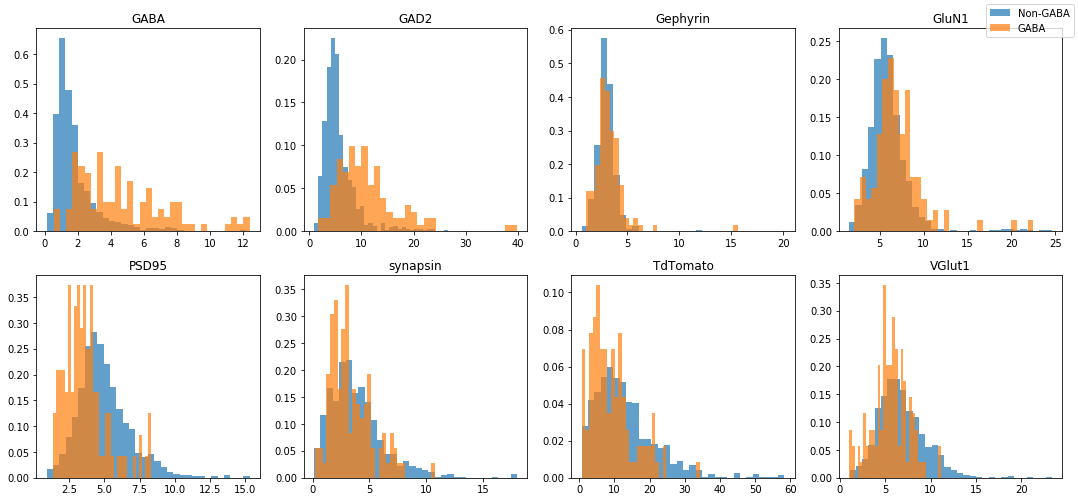

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.ravel()
for i in range(8):
    y0 = X_mean[gaba==0]
    y1 = X_mean[gaba==1]
    ax[i].hist(y0[:, i], bins=32,  density=True, alpha=0.7, label='Non-GABA')
    ax[i].hist(y1[:, i], bins=32, density=True, alpha=0.7, label='GABA')
    ax[i].set_title(channels[i])
    
ax = ax.reshape((2, 4))
fig.tight_layout()
fig.legend()

#### Run classifiers

In [7]:
labels = ['Non-GABA', 'GABA']

Confusion matrix, without normalization
[[0.97037633 0.02962367]
 [0.69909091 0.30090909]]


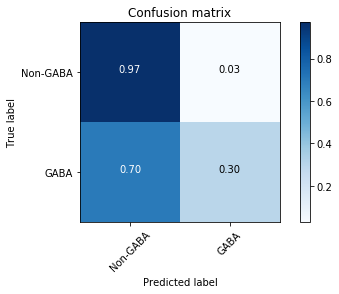

In [8]:
plot_confusion_matrix(rf(X_mean, gaba, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.96084543 0.03915457]
 [0.53090909 0.46909091]]


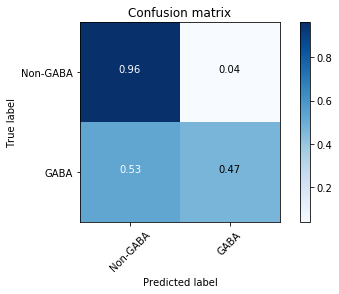

In [9]:
plot_confusion_matrix(lda(X_mean, gaba, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.96278168 0.03721832]
 [0.51454545 0.48545455]]


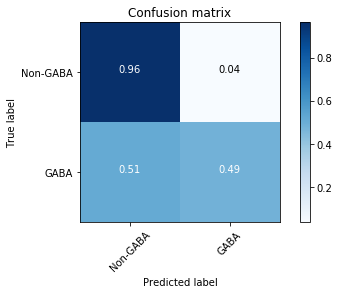

In [10]:
plot_confusion_matrix(lda_lol(X_mean, gaba, n_components=6, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.92826874 0.07173126]
 [0.49636364 0.50363636]]


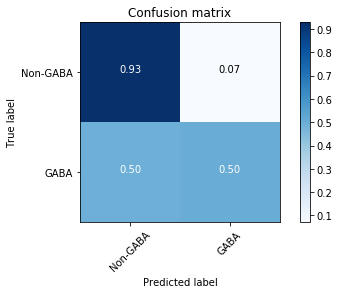

In [11]:
plot_confusion_matrix(qda(X_mean, gaba, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.92728565 0.07271435]
 [0.49818182 0.50181818]]


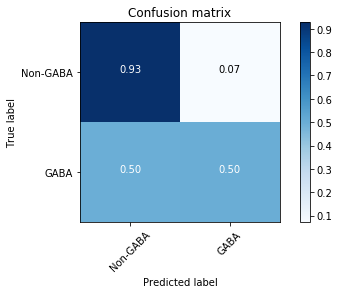

In [12]:
plot_confusion_matrix(qda_lol(X_mean, gaba, normalize=False), classes=labels)

#### Look at the distribution of data for shaft vs non-shaft class

/Users/jaewonc78/Envs/nomads/lib/python3.6/site-packages/matplotlib/legend.py:337: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


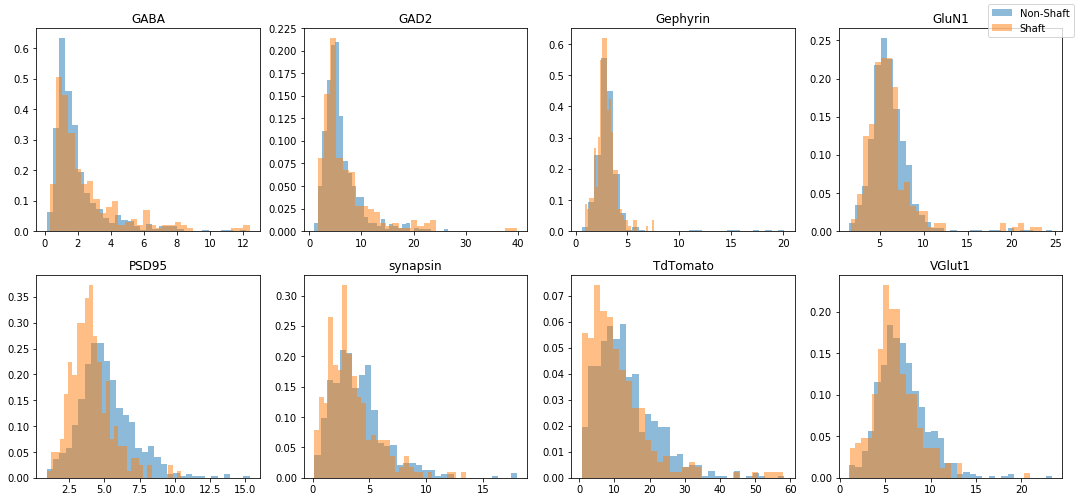

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.ravel()
for i in range(8):
    y0 = X_mean[shaft==0]
    y1 = X_mean[shaft==1]

    ax[i].hist(y0[:, i], bins=32,  density=True, alpha=0.5, label='Non-Shaft')
    ax[i].hist(y1[:, i], bins=32, density=True, alpha=0.5, label='Shaft')

    ax[i].set_title(channels[i])
    
ax = ax.reshape((2, 4))
fig.legend(loc=0)
fig.tight_layout()

In [44]:
labels = ['Non-Shaft', 'Shaft']

Confusion matrix, without normalization
[[0.90913949 0.09086051]
 [0.78888889 0.21111111]]


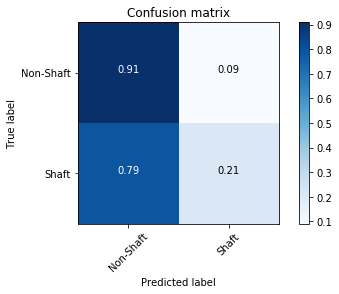

In [45]:
plot_confusion_matrix(rf(X_mean, shaft, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.94693037 0.05306963]
 [0.83641751 0.16358249]]


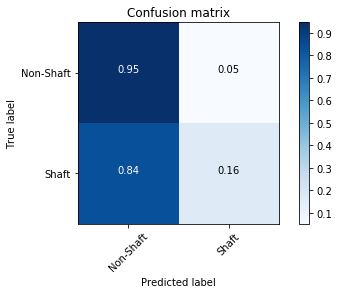

In [46]:
plot_confusion_matrix(lda(X_mean, shaft, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.89146079 0.10853921]
 [0.75973064 0.24026936]]


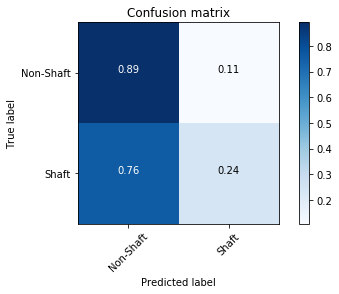

In [47]:
plot_confusion_matrix(qda(X_mean, shaft, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.95303609 0.04696391]
 [0.83215488 0.16784512]]


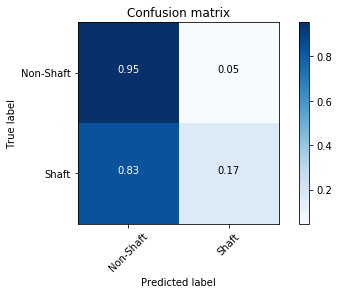

In [48]:
plot_confusion_matrix(lda_lol(X_mean, shaft, n_components=5, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.93628846 0.06371154]
 [0.83940067 0.16059933]]


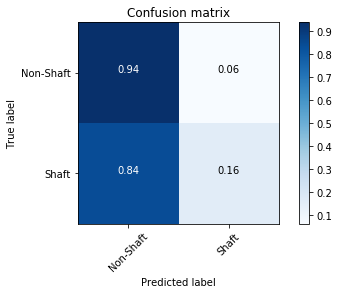

In [53]:
plot_confusion_matrix(qda_lol(X_mean, shaft, n_components=4, normalize=False,  n_repeats=10), classes=labels)

#### Look at the distribution of data for 4 class problem

/Users/jaewonc78/Envs/nomads/lib/python3.6/site-packages/matplotlib/legend.py:337: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


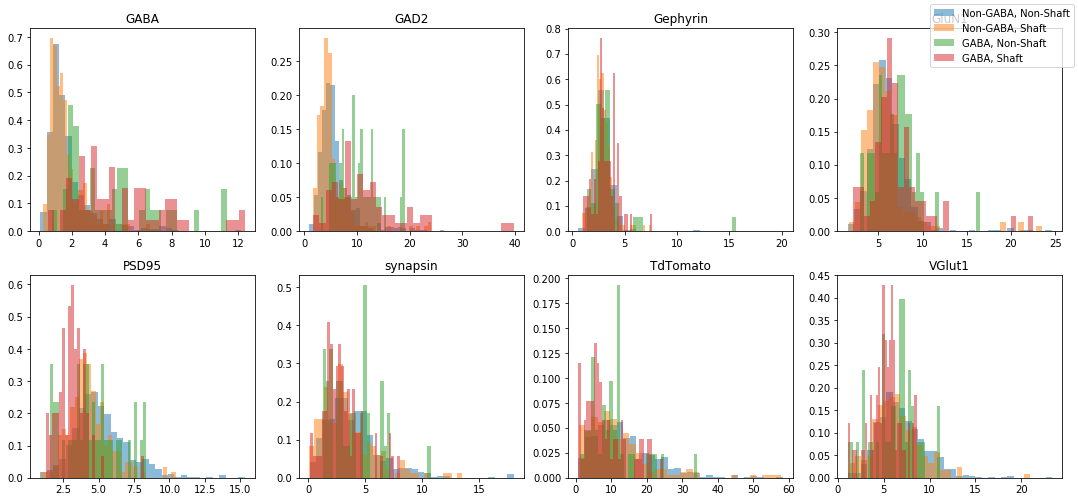

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.ravel()
for i in range(8):
    y0 = X_mean[gaba_shaft==0]
    y1 = X_mean[gaba_shaft==1]
    y2 = X_mean[gaba_shaft==2]
    y3 = X_mean[gaba_shaft==3]
    ax[i].hist(y0[:, i], bins=32,  density=True, alpha=0.5, label='Non-GABA, Non-Shaft')
    ax[i].hist(y1[:, i], bins=32, density=True, alpha=0.5, label='Non-GABA, Shaft')
    ax[i].hist(y2[:, i], bins=32, density=True, alpha=0.5, label='GABA, Non-Shaft')
    ax[i].hist(y3[:, i], bins=32, density=True, alpha=0.5, label='GABA, Shaft')
    ax[i].set_title(channels[i])
    
ax = ax.reshape((2, 4))
fig.legend(loc=0)
fig.tight_layout()

Confusion matrix, without normalization
[[0.73667716 0.18346184 0.03441647 0.04544453]
 [0.61887805 0.31946341 0.00295122 0.05870732]
 [0.535      0.095      0.155      0.215     ]
 [0.35142857 0.09428571 0.07714286 0.47714286]]


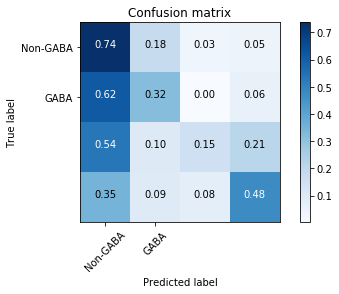

In [14]:
plot_confusion_matrix(qda(X_mean, gaba_shaft, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.7347679  0.18795699 0.03377131 0.0435038 ]
 [0.62914634 0.31117073 0.003      0.05668293]
 [0.515      0.095      0.155      0.235     ]
 [0.32285714 0.10571429 0.08285714 0.48857143]]


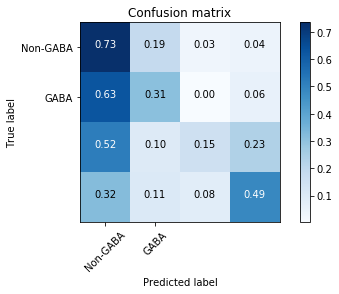

In [15]:
plot_confusion_matrix(qda_lol(X_mean, gaba_shaft, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.87272751 0.08636244 0.01688172 0.02402832]
 [0.85278049 0.10553659 0.00795122 0.03373171]
 [0.72       0.07       0.04       0.17      ]
 [0.35142857 0.09142857 0.06857143 0.48857143]]


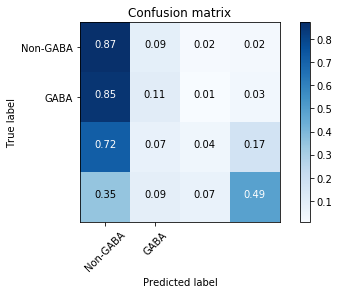

In [42]:
plot_confusion_matrix(rf(X_mean, gaba_shaft, max_features=1., normalize=False), classes=labels)